In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('D:\Rishabh\coding\python\scikit learn\Application_Record.csv')

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [9]:
df['ID'].duplicated().sum() # calculate the duplicates 

df = df.drop_duplicates(subset='ID', keep='first') # Remove the duplicates
df.shape

(438510, 18)

In [10]:
#df['OCCUPATION_TYPE'].value_counts(dropna=False)

df['OCCUPATION_TYPE'].fillna('not_specified', inplace=True) # replaces all the NaN values with 'not_specified'

df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

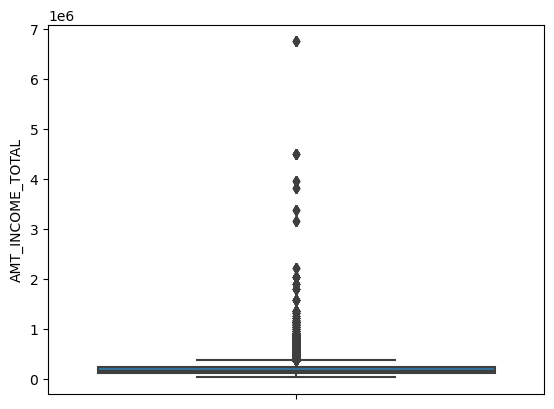

In [11]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')
plt.show()

In [12]:
df[df['AMT_INCOME_TOTAL']>600000] # filtering by income

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,-12197,-1194,1,1,0,0,Managers,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,-12197,-1194,1,1,0,0,Managers,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,-12197,-1194,1,1,0,0,Managers,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,-12197,-1194,1,1,0,0,Managers,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,-19063,-7404,1,0,0,0,Managers,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437990,6604472,M,Y,Y,0,675000.0,Working,Secondary / secondary special,Married,House / apartment,-11475,-1685,1,0,0,1,Laborers,2.0
437991,6604473,M,Y,Y,0,675000.0,Working,Secondary / secondary special,Married,House / apartment,-11475,-1685,1,0,0,1,Laborers,2.0
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,-15273,-1083,1,0,0,1,Managers,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-15582,-1820,1,0,0,1,Managers,1.0


In [13]:
df['AGE'] = round(-df['DAYS_BIRTH']/365.2425) # converting days into years for easy understanding 

df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,33.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,33.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,59.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,not_specified,1.0,62.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,44.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,22.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,not_specified,2.0,59.0


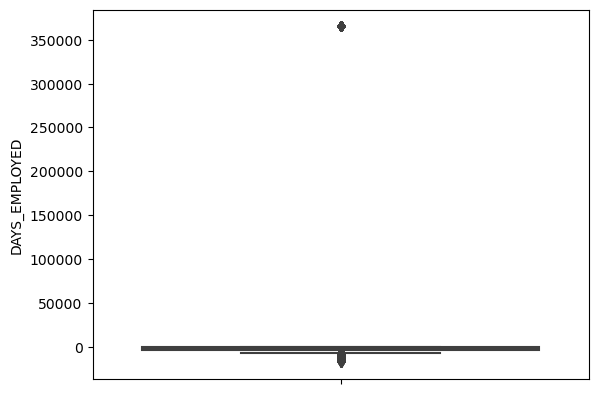

In [14]:
sns.boxplot(df, y='DAYS_EMPLOYED')
plt.show()


In [15]:
df['DAYS_EMPLOYED'].max()

365243

In [16]:
df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)
df['DAYS_EMPLOYED'].max()

0

In [17]:
df['YEARS_EMPLOYED'] = round(-df['DAYS_EMPLOYED']/365.2425) # converting days into years for easy understanding 

df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,0,1,0,0,0,not_specified,1.0,62.0,0.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,44.0,8.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,22.0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,0,1,0,0,0,not_specified,2.0,59.0,0.0


In [18]:
# df = df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'])
# removed columns DAYS_BIRTH and DAYS_EMPLOYED

df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,not_specified,2.0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,0,1,0,0,0,not_specified,1.0,62.0,0.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,44.0,8.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,22.0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,0,1,0,0,0,not_specified,2.0,59.0,0.0


In [19]:
df.drop(columns=['FLAG_MOBIL'], inplace=True)

In [20]:
# Standardizing the columns using StandardScaler(making mean= 0 and sd= 1)

columns_to_scale = ['AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,-0.589595,2.179820,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,not_specified,-0.216747,-0.942351,0.919336
1,5008805,M,Y,Y,-0.589595,2.179820,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,not_specified,-0.216747,-0.942351,0.919336
2,5008806,M,Y,Y,-0.589595,-0.681497,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,-0.216747,1.325320,-0.449645
3,5008808,F,N,Y,-0.589595,0.749162,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,-1.331336,0.714793,0.310900
4,5008809,F,N,Y,-0.589595,0.749162,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,-1.331336,0.714793,0.310900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,-0.589595,-0.477117,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,0,0,0,0,not_specified,-1.331336,1.586974,-0.905971
438553,6840222,F,N,N,-0.589595,-0.763249,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,0,0,0,Laborers,-1.331336,0.017048,0.310900
438554,6841878,F,N,N,-0.589595,-1.212884,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,0,0,Sales staff,-1.331336,-1.901750,-0.753862
438555,6842765,F,N,Y,-0.589595,-1.049381,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,0,0,0,0,not_specified,-0.216747,1.325320,-0.905971


In [21]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df = pd.get_dummies(df, columns=columns_to_encode, dtype='int')


In [22]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,5008804,-0.589595,2.179820,-12005,-4542,-0.216747,-0.942351,0.919336,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5008805,-0.589595,2.179820,-12005,-4542,-0.216747,-0.942351,0.919336,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5008806,-0.589595,-0.681497,-21474,-1134,-0.216747,1.325320,-0.449645,0,1,...,0,0,0,0,0,0,0,1,0,0
3,5008808,-0.589595,0.749162,-19110,-3051,-1.331336,0.714793,0.310900,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5008809,-0.589595,0.749162,-19110,-3051,-1.331336,0.714793,0.310900,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,-0.589595,-0.477117,-22717,0,-1.331336,1.586974,-0.905971,0,1,...,0,0,0,0,0,0,0,0,0,1
438553,6840222,-0.589595,-0.763249,-15939,-3007,-1.331336,0.017048,0.310900,1,0,...,0,0,0,0,0,0,0,0,0,0
438554,6841878,-0.589595,-1.212884,-8169,-372,-1.331336,-1.901750,-0.753862,1,0,...,0,0,0,0,0,1,0,0,0,0
438555,6842765,-0.589595,-1.049381,-21673,0,-0.216747,1.325320,-0.905971,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# importing other dataset
df1 = pd.read_csv('D:\Rishabh\coding\python\scikit learn\Credit-Record.csv')
df1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [24]:
df1.duplicated().sum()

0

In [25]:
df1['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [26]:
df1[df1['STATUS'].isin(['X', 'C'])]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [27]:
df1['target']=df1['STATUS']
df1['target'].replace('X', 0, inplace=True)
df1['target'].replace('C', 0, inplace=True)
df1['target']=df1['target'].astype(int)
df1.loc[df1['target']>=1,'target']=1
df1

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [28]:
df1['ID'].duplicated().sum()

1002590

In [29]:
df2=pd.DataFrame(df1.groupby(['ID'])['target'].agg("max")).reset_index()
df2

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [30]:
df2['target'].value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [39]:
# merging
new_df = pd.merge(df, df2, how='inner', on=['ID'])
new_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target
0,5008804,-0.589595,2.179820,-12005,-4542,-0.216747,-0.942351,0.919336,0,1,...,0,0,0,0,0,0,0,0,1,1
1,5008805,-0.589595,2.179820,-12005,-4542,-0.216747,-0.942351,0.919336,0,1,...,0,0,0,0,0,0,0,0,1,1
2,5008806,-0.589595,-0.681497,-21474,-1134,-0.216747,1.325320,-0.449645,0,1,...,0,0,0,0,0,0,1,0,0,0
3,5008808,-0.589595,0.749162,-19110,-3051,-1.331336,0.714793,0.310900,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5008809,-0.589595,0.749162,-19110,-3051,-1.331336,0.714793,0.310900,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,-0.589595,1.157921,-17348,-2420,-0.216747,0.278703,0.158791,0,1,...,1,0,0,0,0,0,0,0,0,1
36453,5149834,-0.589595,-0.272737,-12387,-1325,-0.216747,-0.855133,-0.297536,1,0,...,0,1,0,0,0,0,0,0,0,1
36454,5149838,-0.589595,-0.272737,-12387,-1325,-0.216747,-0.855133,-0.297536,1,0,...,0,1,0,0,0,0,0,0,0,1
36455,5150049,-0.589595,0.871790,-17958,-655,-0.216747,0.453139,-0.601753,1,0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
start_df = pd.DataFrame(df1.groupby(['ID'])['MONTHS_BALANCE'].agg('min')).reset_index() # finding the time since the account opened

start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True) # renaming the column

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH'] # making entries positive 

start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [40]:
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])
new_df


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target,ACCOUNT_LENGTH
0,5008804,-0.589595,2.179820,-12005,-4542,-0.216747,-0.942351,0.919336,0,1,...,0,0,0,0,0,0,0,1,1,15
1,5008805,-0.589595,2.179820,-12005,-4542,-0.216747,-0.942351,0.919336,0,1,...,0,0,0,0,0,0,0,1,1,14
2,5008806,-0.589595,-0.681497,-21474,-1134,-0.216747,1.325320,-0.449645,0,1,...,0,0,0,0,0,1,0,0,0,29
3,5008808,-0.589595,0.749162,-19110,-3051,-1.331336,0.714793,0.310900,1,0,...,0,0,0,1,0,0,0,0,0,4
4,5008809,-0.589595,0.749162,-19110,-3051,-1.331336,0.714793,0.310900,1,0,...,0,0,0,1,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,-0.589595,1.157921,-17348,-2420,-0.216747,0.278703,0.158791,0,1,...,0,0,0,0,0,0,0,0,1,11
36453,5149834,-0.589595,-0.272737,-12387,-1325,-0.216747,-0.855133,-0.297536,1,0,...,1,0,0,0,0,0,0,0,1,23
36454,5149838,-0.589595,-0.272737,-12387,-1325,-0.216747,-0.855133,-0.297536,1,0,...,1,0,0,0,0,0,0,0,1,32
36455,5150049,-0.589595,0.871790,-17958,-655,-0.216747,0.453139,-0.601753,1,0,...,0,0,0,1,0,0,0,0,1,9


In [ ]:
new_df.drop(columns=['ACCOUNT_LENGTH_x'],inplace=True)
new_df.rename(columns={'ACCOUNT_LENGTH_y': 'ACCOUNT_LENGTH'}, inplace=True)
new_df

In [ ]:
x = new_df.drop(columns=['target'])

y = new_df['target']


In [50]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=0, stratify=y, test_size=.25)

In [53]:
### Logistic Regression 
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()

clf_log.fit(train_x, train_y)


LogisticRegression()

In [54]:
clf_log.score(train_x, train_y)

0.8823056104162095

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
predict_y = clf_log.predict(test_x)

print(confusion_matrix(test_y, predict_y))
print(classification_report(test_y, predict_y))

[[8042    0]
 [1073    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8042
           1       0.00      0.00      0.00      1073

    accuracy                           0.88      9115
   macro avg       0.44      0.50      0.47      9115
weighted avg       0.78      0.88      0.83      9115



c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
